PMR Assignment Part 1/2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Prior probability of s1, s2, s3 given in (d)
p_s1 = np.array([0.01, 0.01, 0.08, 0.2, 0.7])
p_s2 = np.array([0.02, 0.02, 0.06, 0.3, 0.6])
p_s3 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [3]:
#All function need for Question 2

#Conditional probability for black winning based on the model in (d)
def p_rk_1_given_sbk_swk_1(sbk, swk):
    return ((1/10.) * (sbk - swk) + 0.5)

#Conditional probability for black winning based on the model in (h)
def p_rk_1_given_sbk_swk_2(sbk, swk):
    return ((1/2) * (1 + np.tanh(sbk - swk)))



#Function computing psi_2(s3) in (f)
def compute_psi_2_s3(p_rk_1_given_sbk_swk):
    psi_2_s3 = np.zeros((5,))
    for s3 in range(5):
        sum_s2 = 0
        for s2 in range(5):
            sum_s1 = 0
            for s1 in range(5):
                phi_1 = p_s1
                sum_s1 += phi_1[s1] * p_rk_1_given_sbk_swk(s1+1, s2+1) * 
                          p_rk_1_given_sbk_swk(s3+1, s1+1)
            phi_s2 = p_s2
            sum_s2 += phi_s2[s2] * sum_s1 * (1 - p_rk_1_given_sbk_swk(s2+1, s3+1))
        psi_2_s3[s3] += sum_s2
    return (psi_2_s3)

#Function computing posterior(s3) in (g)
def compute_p_s3_given_r(psi_1_s3, psi_2_s3):
    p_s3_given_r_unnorm = psi_1_s3 * psi_2_s3
    p_s3_given_r = p_s3_given_r_unnorm / np.sum(p_s3_given_r_unnorm)
    return (p_s3_given_r)

Question (f)

In [10]:
#(f)
psi_2_s3_1 = compute_psi_2_s3(p_rk_1_given_sbk_swk_1)
psi_2_s3_1 = psi_2_s3_1 / np.max(psi_2_s3_1)
psi_1_s3 = p_s3
psi_1_s3 = psi_1_s3 / np.max(psi_1_s3)

print('psi_1(s3)=%s'%psi_1_s3)
print('psi_2(s3)=%s'%psi_2_s3_1)

psi_1(s3)=[1. 1. 1. 1. 1.]
psi_2(s3)=[0.07437167 0.20685222 0.4052838  0.66966639 1.        ]


Question (g)

Posterior: P[s3|r1=1,r2=0,r3=1]=[0.03156459 0.08779157 0.17200928 0.28421771 0.42441686]


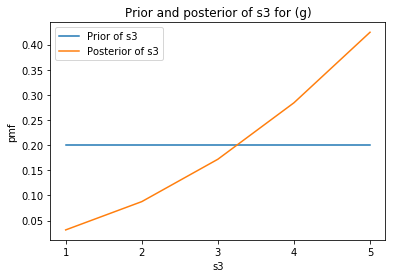

In [12]:
#(g)
psi_1_s3 = p_s3
p_s3_given_r_1 = compute_p_s3_given_r(psi_1_s3, psi_2_s3_1)
print('Posterior: P[s3|r1=1,r2=0,r3=1]=%s'%p_s3_given_r_1)

#plot
x = np.arange(1,6,1)
y_1 = p_s3
y_2 = p_s3_given_r_1
plt.plot(x, y_1,label='Prior of s3')
plt.plot(x, y_2,label='Posterior of s3')
plt.xlabel('s3')
plt.ylabel('pmf')
plt.title('Prior and posterior of s3 for (g)')
plt.xticks([1,2,3,4,5])
plt.legend()
plt.show()

Explanation:

As can be seen from the figure above, the posterior of the third player having a higher skill level is high and that of having a lower skill low, whereas the prior just assigns the same probability to all 5 different skill levels from 1 to 5. Such a difference arises since the posterior is computed by observing a series of game results, whereas the prior is just initialized to the same values without knowing anything about the skill of the third player. To be more specific, from the condition of r(2) =0 and r(3) =1 we know that the third player beat other two players. Hence, we are more likely to believe that the third player has a high skill level. The update of posterior here correctly reflects such a belief after observing game results. 

Question (h)

Posterior: P[s3|r1=1,r2=0,r3=1]=[2.43680212e-04 2.50774677e-03 2.12831267e-02 1.63771797e-01
 8.12193649e-01]


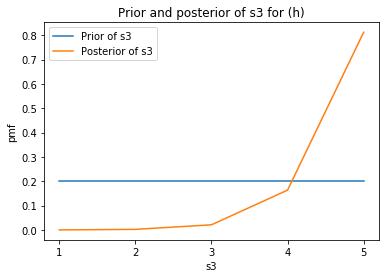

In [13]:
#(h)
psi_2_s3_2 = compute_psi_2_s3(p_rk_1_given_sbk_swk_2)
psi_2_s3_2 = psi_2_s3_2 / np.max(psi_2_s3_2)

psi_1_s3 = p_s3
p_s3_given_r_2 = compute_p_s3_given_r(psi_1_s3, psi_2_s3_2)
print('Posterior: P[s3|r1=1,r2=0,r3=1]=%s'%p_s3_given_r_2)

#plot
x = np.arange(1,6,1)
y_1 = p_s3
y_2 = p_s3_given_r_2
plt.plot(x, y_1, label='Prior of s3')
plt.plot(x, y_2, label='Posterior of s3')
plt.xticks([1,2,3,4,5])
plt.xlabel('s3')
plt.ylabel('pmf')
plt.title('Prior and posterior of s3 for (h)')
plt.legend()
plt.show()

Explanation:

As can be seen from the figure above, the unbalance (variance) of posterior over different skill levels in question (h) is larger than the one in question (g). In question (h) the posterior over s3=5 is extremely large while the posterior over s3= 1 is extremely small. On the contrary, in question (g) the change of posteriors over from s3= 1 to s3= 5 is relatively smoother. Such differences are caused by two different defined models of posterior P[r(k)=1|sbk,swk]. 


We plot two posterior functions of question (d) and (h) in figure below. We can see that the posterior in question (d) changes linearly with respect to the difference of two players’ skill levels, whereas the one in question (h) has a non-linear property. Moreover, with the same difference of two players’ skill levels, the posterior model in question (h) makes higher belief that the player with higher skill level has higher probability to win the game. In the expression P[s3|r(1) =1,r(2) =0,r(3) =1]= P[s3]∑s1,s2 P[s2]P[r(2)=0|s2,s3]P[s1] P[r(1)=1|s1,s2] P[r(3)=1|s3,s1], such differences between two models mean that when s3=5, P[r(2)=0|s2,s3] and P[r(3)=1|s3,s1] in the model of question(h) would be much larger than those in the model of question(d) with the corresponding s1 and s2 (except the case s1=s2 =5 where these two terms in question (h) and (d) would be 0.5). As a result, the posterior over s3 =5 with summing out s1 and s2 in question (h) would be larger than that in question (d). Similarly, the posterior over s3 =1 in question (h) would be much smaller than that in question (g). 


Text(0, 0.5, 'P[rk=1|sbk,swk]')

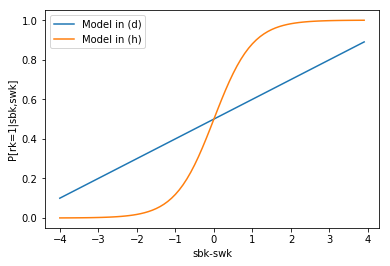

In [16]:
#Plotting the difference between the model of conditional probability of black winning,
#given in (d) and (h)
x = np.arange(-4,4,0.1)
y = ((1/2) * (1 + np.tanh(x)))
xx = np.arange(-4,4,0.1)
yy = (1/10) * x + 0.5
plt.plot(xx,yy,label='Model in (d)')
plt.plot(x,y,label='Model in (h)')
plt.legend()
plt.xlabel('sbk-swk')
plt.ylabel('P[rk=1|sbk,swk]')

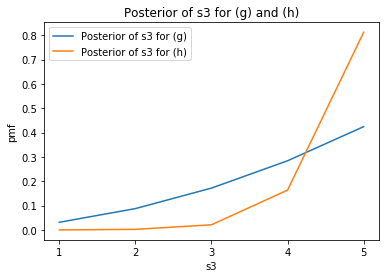

In [8]:
#Plotting the difference between the posterior obtain in (g) and (h)
x = np.arange(1,6,1)
y_1 = p_s3_given_r_1
y_2 = p_s3_given_r_2
plt.plot(x,y_1,label='Posterior of s3 for (g)')
plt.plot(x,y_2,label='Posterior of s3 for (h)')
plt.xticks([1,2,3,4,5])
plt.xlabel('s3')
plt.ylabel('pmf')
plt.title('Posterior of s3 for (g) and (h)')
plt.legend()
plt.show()